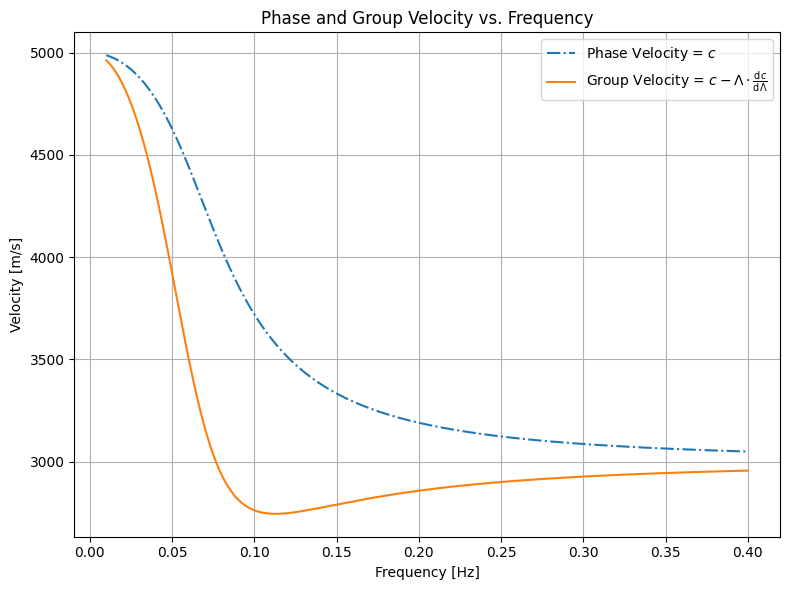

In [1]:
import numpy as np
import matplotlib.pyplot as plt

with open("../data/data.bin", "rb") as f:
    size = np.fromfile(f, dtype=np.uintp, count=1)[0]
    frequencies = np.fromfile(f, dtype=np.float64, count=size)
    c_theoretical = np.fromfile(f, dtype=np.float64, count=size)

wavelengths = c_theoretical / frequencies
dc_dlambda = np.gradient(c_theoretical, wavelengths)
v_group = c_theoretical - wavelengths * dc_dlambda

plt.figure(figsize=(8, 6))
plt.plot(frequencies, c_theoretical, '-.', label = r'Phase Velocity = $c$')
plt.plot(frequencies, v_group, '-', label=r'Group Velocity = $c - \Lambda \cdot \frac{\text{d} c}{\text{d} \Lambda}$')
plt.xlabel("Frequency [Hz]")
plt.ylabel("Velocity [m/s]")
plt.title("Phase and Group Velocity vs. Frequency")
plt.grid(True)
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig("../plot/velocities.pdf", dpi=300)
plt.show()